# gridExtra package
- Arrange plots with grid.arrange() function

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(ggthemes)
library(grid)
library(gridExtra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



#### Load data

In [2]:
worldcup <- read_csv("Data/worldcup.csv")

worldcup <- worldcup %>%
  select(player_name, everything()) %>%
  rename(Name = player_name)

head(worldcup)

Parsed with column specification:
cols(
  Team = col_character(),
  Position = col_character(),
  Time = col_integer(),
  Shots = col_integer(),
  Passes = col_integer(),
  Tackles = col_integer(),
  Saves = col_integer(),
  player_name = col_character()
)


Name,Team,Position,Time,Shots,Passes,Tackles,Saves
Abdoun,Algeria,Midfielder,16,0,6,0,0
Abe,Japan,Midfielder,351,0,101,14,0
Abidal,France,Defender,180,0,91,6,0
Abou Diaby,France,Midfielder,270,1,111,5,0
Aboubakar,Cameroon,Forward,46,2,16,0,0
Abreu,Uruguay,Forward,72,0,15,0,0


### Create a Graph with 2 Plots side by side
- Using "worldcup" dataset
- Assign ggplot object for each plot and input these objects to a grid.arrange call

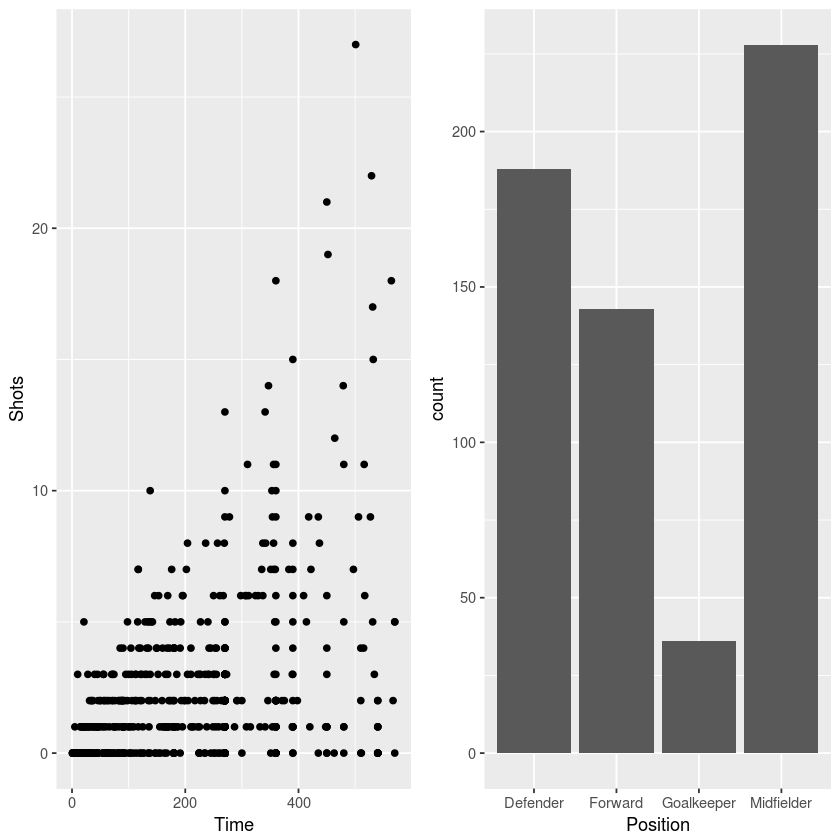

In [3]:
time_vs_shots <- worldcup %>%
  ggplot() +
  geom_point(aes(x = Time, y = Shots))

player_positions <- worldcup %>%
  ggplot() +
  geom_bar(aes(x = Position))

grid.arrange(time_vs_shots, player_positions, ncol = 2)

### Use layout_matrix() to specify different layouts:
- Divide the plotting area into columns
- Let the Scatterplot take up 1/3 of the area and the Barplot to take 2/3 of the area

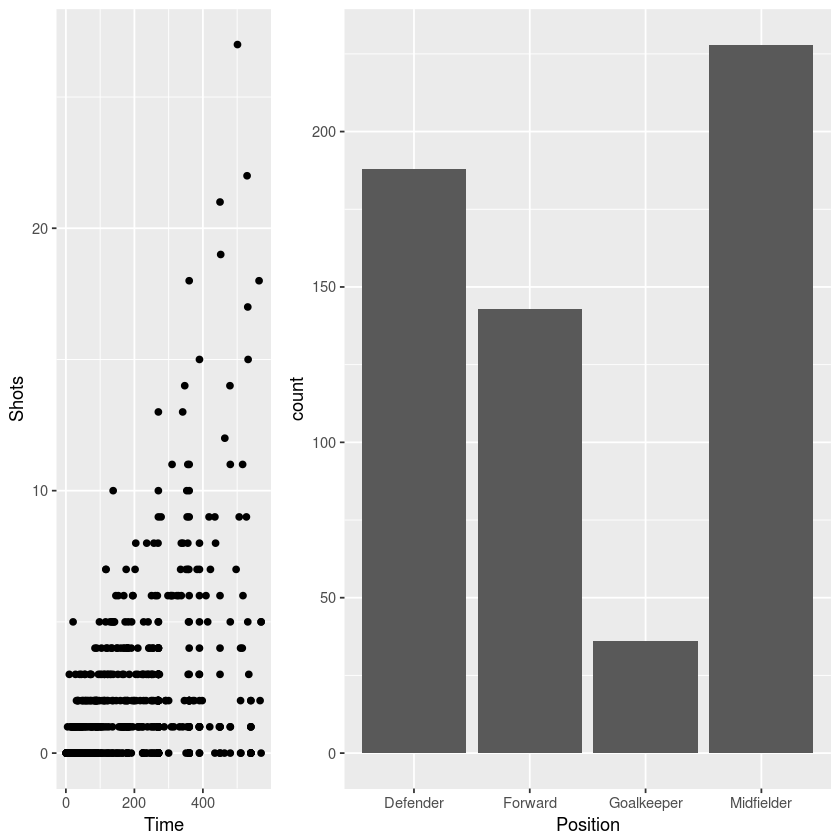

In [4]:
grid.arrange(time_vs_shots, player_positions, layout_matrix = matrix(c(1, 2, 2), ncol = 3))

#### Let the Scatterplot take up 2/3 of the area and the Barplot to take 1/3 of the area

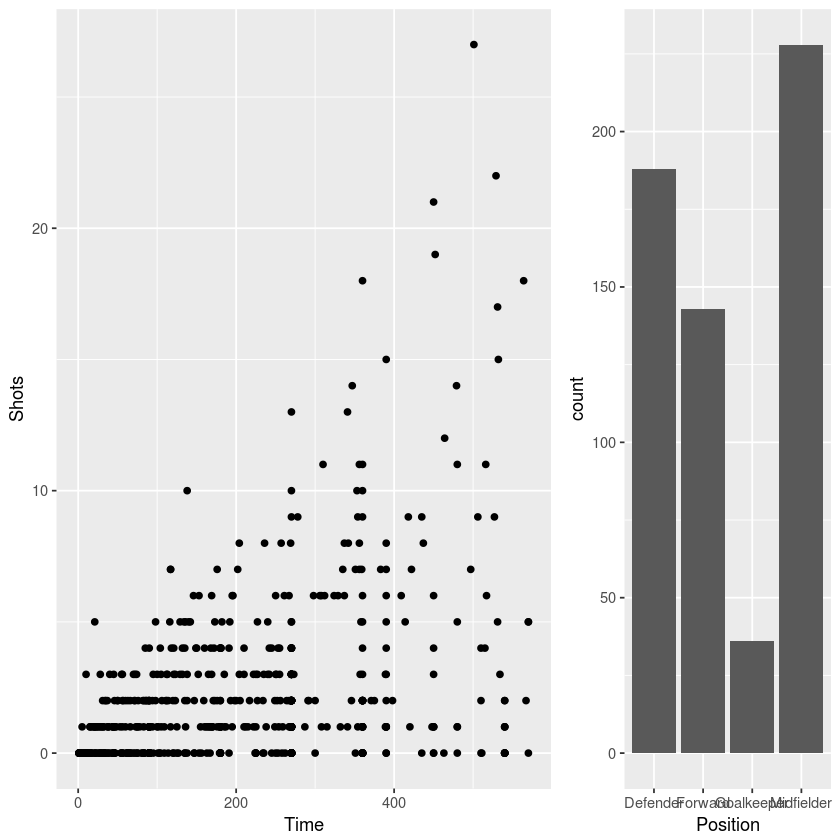

In [5]:
grid.arrange(time_vs_shots, player_positions, layout_matrix = matrix(c(1, 1, 2), ncol = 3))

#### Let the Scatterplot take up 2/3 of the area and the Barplot to take 1/3 of the area by rows

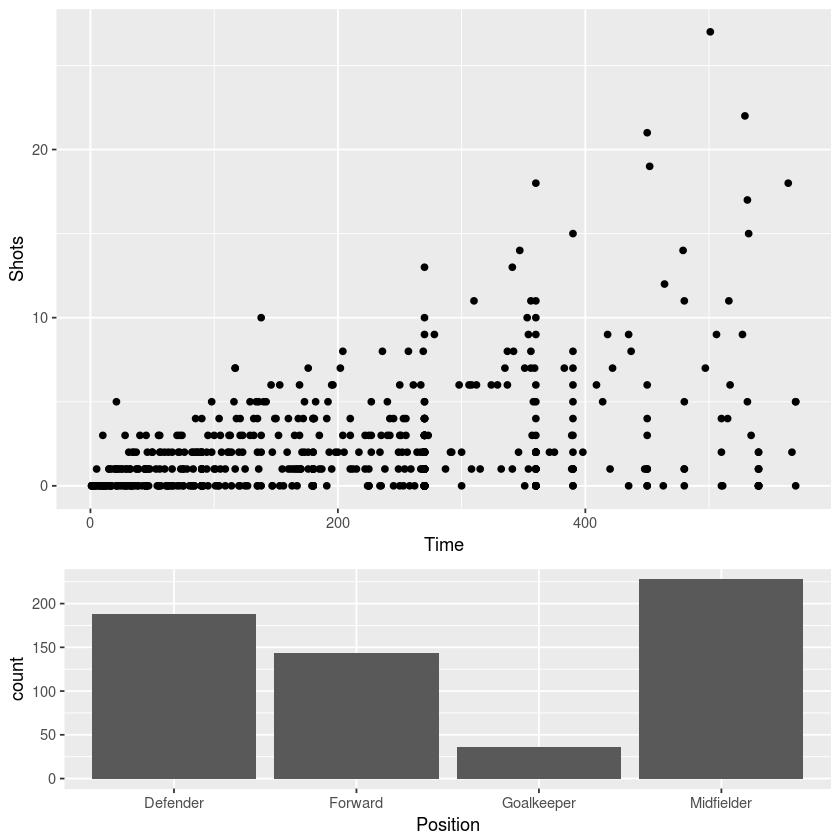

In [6]:
grid.arrange(time_vs_shots, player_positions, layout_matrix = matrix(c(1, 1, 2), nrow = 3))

#### To fill multiple rows, leave space blank with NA in layout matrix

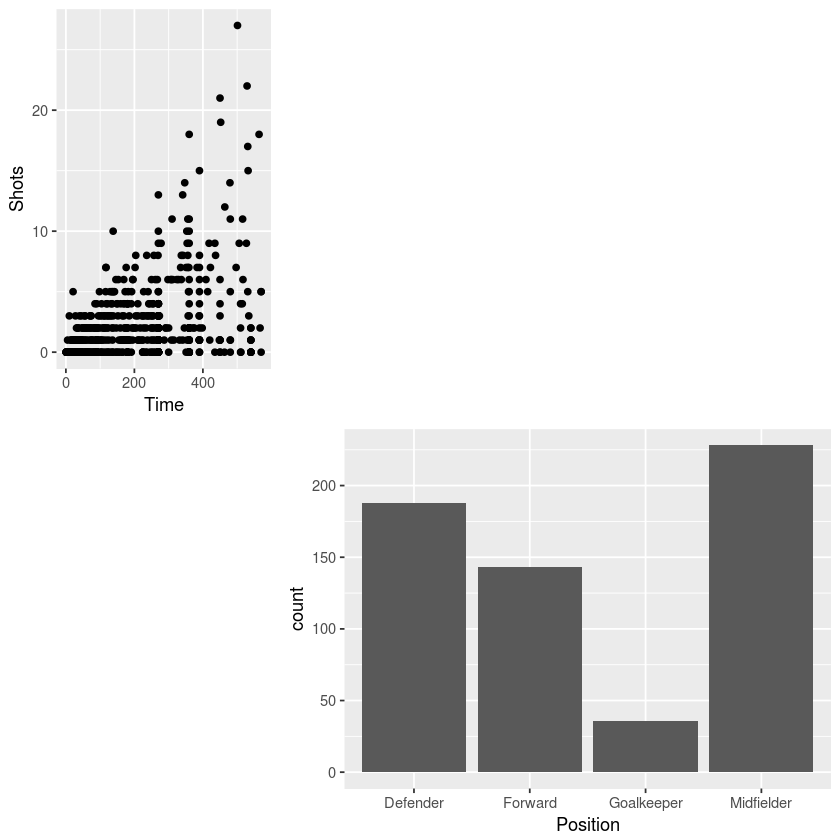

In [7]:
grid.arrange(time_vs_shots, player_positions, layout_matrix = matrix(c(1, NA, NA, NA, 2, 2), byrow = TRUE, ncol = 3))

#### To fill multiple rows, leave space blank with NA in layout matrix

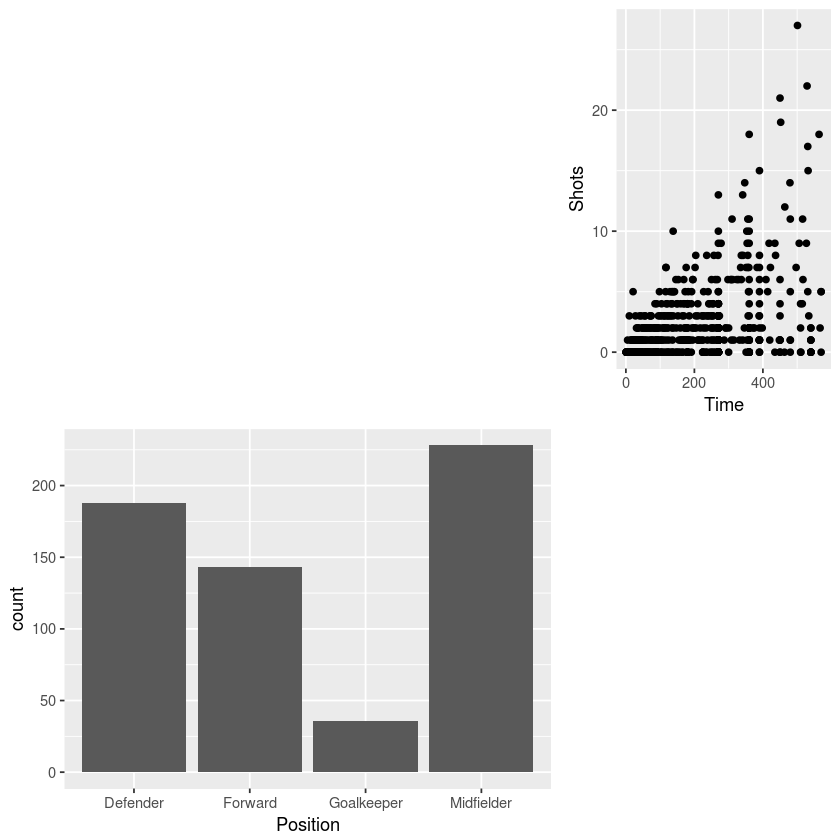

In [8]:
grid.arrange(time_vs_shots, player_positions, layout_matrix = matrix(c(NA, NA, 1, 2, 2, NA), byrow = TRUE, ncol = 3))

#### To fill multiple rows and Span the Rows, leave space blank with NA in layout matrix

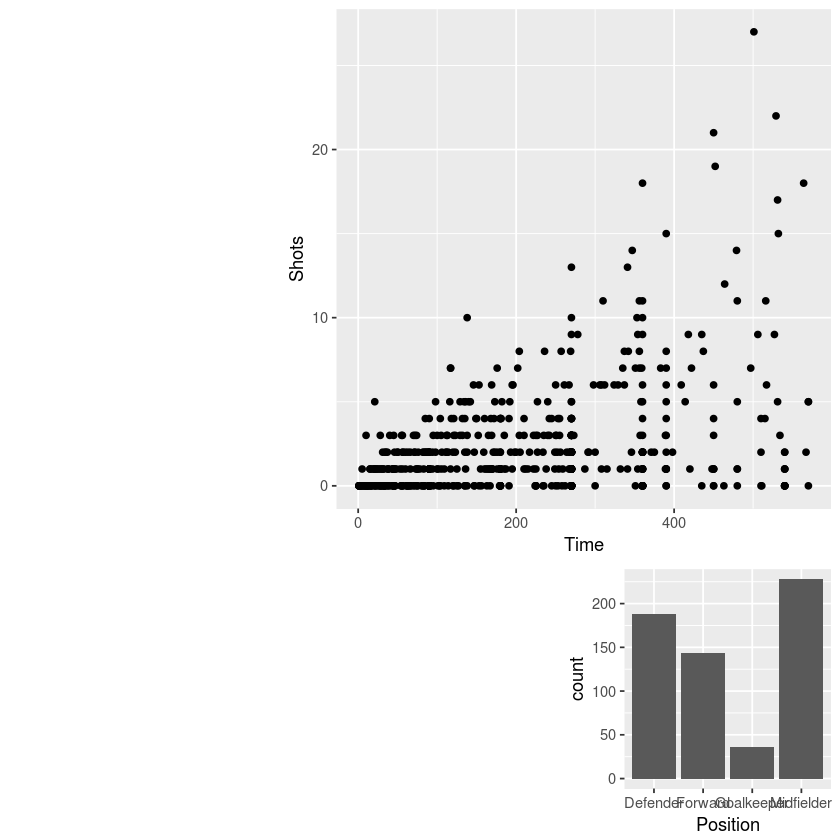

In [9]:
grid.arrange(time_vs_shots, player_positions, layout_matrix = matrix(c(NA, 1, 1, NA, 1, 1, NA, NA, 2), byrow = TRUE, nrow = 3))

<hr>

# Using the tableGrob() function to add tables to the Graphs

### Add Table with the average Time and Shots for players on the top 4 Teams:


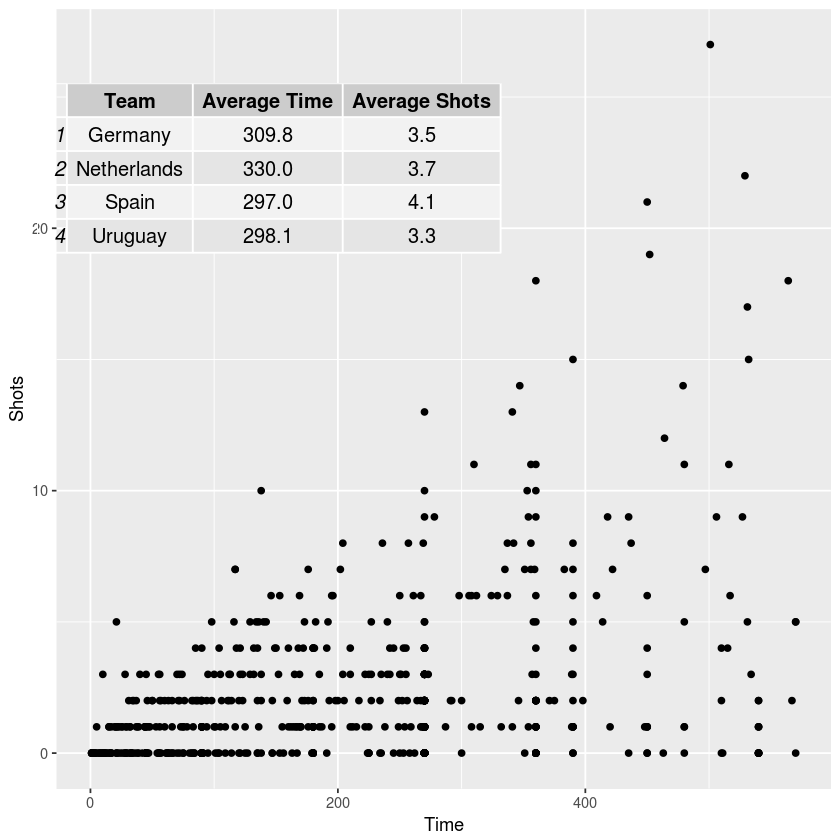

In [11]:
worldcup_table <- worldcup %>%
  filter(Team %in% c("Germany", "Spain", "Netherlands", "Uruguay")) %>%
  group_by(Team) %>%
  summarize("Average Time" = round(mean(Time), 1), "Average Shots" = round(mean(Shots), 1)) %>%
  tableGrob()

grid.draw(ggplotGrob(time_vs_shots))

wc_table_vp <- viewport(x = 0.22, y = 0.85, just = c("left", "top"), height = 0.1, width = 0.2)

pushViewport(wc_table_vp)
grid.draw(worldcup_table)
popViewport()